# K-nearest neighbours

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importing the data set

In [3]:
data=pd.read_csv('heart.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Checking for number of types of classes we have to classify into

In [4]:
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

Drawing graphs for differnt attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027F0169BE88>]],
      dtype=object)

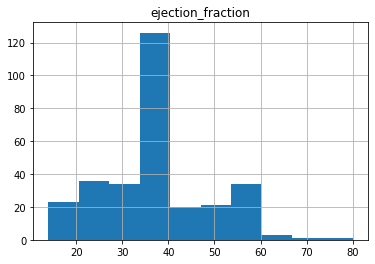

In [5]:
data.hist(column='ejection_fraction')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027F017FA888>]],
      dtype=object)

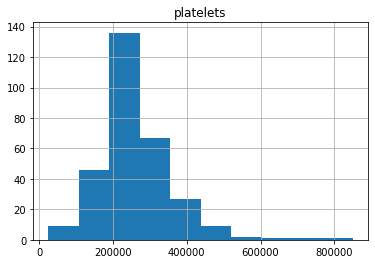

In [6]:
data.hist(column='platelets')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027F01881808>]],
      dtype=object)

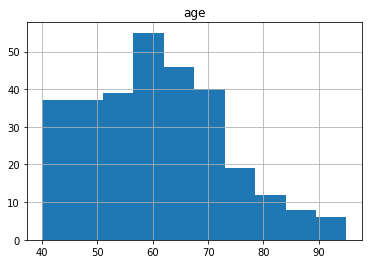

In [7]:
data.hist(column='age')

Display all the attributes present in the data set

In [8]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

convert pandas data frame to numpy array

In [11]:
X=data[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']].values

In [13]:
Y=data['DEATH_EVENT'].values

Normalize the data

In [14]:
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))

Split data Train and Test

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

Classification Algorithm

In [17]:
from sklearn.neighbors import KNeighborsClassifier

Lets train for k=5

In [19]:
k=5
k_means=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
k_means

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
y_predict=k_means.predict(x_test)

To measure the accuracy of the model

In [23]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, k_means.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Train set Accuracy:  0.8326359832635983
Test set Accuracy:  0.7333333333333333


Lets train for k=7

In [24]:
k=7
k_means=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
k_means

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [25]:
y_predict=k_means.predict(x_test)

In [26]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, k_means.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Train set Accuracy:  0.7907949790794979
Test set Accuracy:  0.7666666666666667


Lets train for k=3

In [27]:
k=3
k_means=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
k_means

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [28]:
y_predict=k_means.predict(x_test)

In [29]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, k_means.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Train set Accuracy:  0.8326359832635983
Test set Accuracy:  0.65


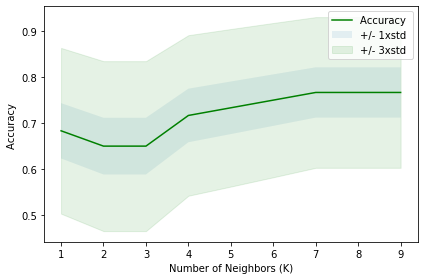

In [32]:
Ks=10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [33]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7666666666666667 with k= 7
